In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
encoding_dim = 32
input_img = Input(shape=(784,))
# "encoded" est la représentation codée de l'entrée
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [3]:
encoder = Model(input_img, encoded)

In [4]:
encoded_input = Input(shape=(encoding_dim,))
# récupérer la dernière couche du modèle d'auto-codeur
decoder_layer = autoencoder.layers[-1]
#decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [7]:
(train_images, train_labels), (x_test, y_test) = mnist.load_data()
train_images = train_images.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


x, y = train_images, train_labels
x_train = x
y_train = y.reshape(-1, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
history=autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 51us/step - loss: 0.2761 - accuracy: 0.7836 - val_loss: 0.1879 - val_accuracy: 0.7995
Epoch 2/200
60000/60000 [==============================] - 3s 50us/step - loss: 0.1690 - accuracy: 0.8031 - val_loss: 0.1517 - val_accuracy: 0.8055
Epoch 3/200
60000/60000 [==============================] - 3s 47us/step - loss: 0.1431 - accuracy: 0.8074 - val_loss: 0.1330 - val_accuracy: 0.8079
Epoch 4/200
60000/60000 [==============================] - 3s 49us/step - loss: 0.1284 - accuracy: 0.8097 - val_loss: 0.1214 - val_accuracy: 0.8099
Epoch 5/200
60000/60000 [==============================] - 3s 44us/step - loss: 0.1187 - accuracy: 0.8112 - val_loss: 0.1134 - val_accuracy: 0.8109
Epoch 6/200
60000/60000 [==============================] - 2s 41us/step - loss: 0.1117 - accuracy: 0.8121 - val_loss: 0.1075 - val_accuracy: 0.8117
Epoch 7/200
60000/60000 [==============================] - 3s 

Epoch 56/200
60000/60000 [==============================] - 3s 48us/step - loss: 0.0927 - accuracy: 0.8142 - val_loss: 0.0917 - val_accuracy: 0.8133
Epoch 57/200
60000/60000 [==============================] - 3s 44us/step - loss: 0.0927 - accuracy: 0.8142 - val_loss: 0.0916 - val_accuracy: 0.8133
Epoch 58/200
60000/60000 [==============================] - 3s 49us/step - loss: 0.0927 - accuracy: 0.8142 - val_loss: 0.0916 - val_accuracy: 0.8133
Epoch 59/200
60000/60000 [==============================] - 3s 48us/step - loss: 0.0927 - accuracy: 0.8142 - val_loss: 0.0916 - val_accuracy: 0.8133
Epoch 60/200
60000/60000 [==============================] - 3s 49us/step - loss: 0.0926 - accuracy: 0.8142 - val_loss: 0.0917 - val_accuracy: 0.8134
Epoch 61/200
60000/60000 [==============================] - 3s 42us/step - loss: 0.0926 - accuracy: 0.8142 - val_loss: 0.0917 - val_accuracy: 0.8133
Epoch 62/200
60000/60000 [==============================] - 3s 47us/step - loss: 0.0926 - accuracy: 0.8142

Epoch 111/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.0924 - accuracy: 0.8143 - val_loss: 0.0914 - val_accuracy: 0.8133
Epoch 112/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.0924 - accuracy: 0.8143 - val_loss: 0.0914 - val_accuracy: 0.8133
Epoch 113/200
60000/60000 [==============================] - 3s 46us/step - loss: 0.0924 - accuracy: 0.8143 - val_loss: 0.0914 - val_accuracy: 0.8134
Epoch 114/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.0924 - accuracy: 0.8143 - val_loss: 0.0913 - val_accuracy: 0.8133
Epoch 115/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.0924 - accuracy: 0.8143 - val_loss: 0.0913 - val_accuracy: 0.8133
Epoch 116/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.0924 - accuracy: 0.8143 - val_loss: 0.0913 - val_accuracy: 0.8133
Epoch 117/200
60000/60000 [==============================] - 2s 41us/step - loss: 0.0923 - accuracy:

60000/60000 [==============================] - 4s 70us/step - loss: 0.0921 - accuracy: 0.8143 - val_loss: 0.0911 - val_accuracy: 0.8133
Epoch 166/200
60000/60000 [==============================] - 4s 74us/step - loss: 0.0921 - accuracy: 0.8143 - val_loss: 0.0912 - val_accuracy: 0.8133
Epoch 167/200
60000/60000 [==============================] - 4s 67us/step - loss: 0.0921 - accuracy: 0.8143 - val_loss: 0.0912 - val_accuracy: 0.8133
Epoch 168/200
60000/60000 [==============================] - 3s 46us/step - loss: 0.0921 - accuracy: 0.8143 - val_loss: 0.0912 - val_accuracy: 0.8133
Epoch 169/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.0921 - accuracy: 0.8143 - val_loss: 0.0912 - val_accuracy: 0.8133
Epoch 170/200
60000/60000 [==============================] - 3s 43us/step - loss: 0.0921 - accuracy: 0.8143 - val_loss: 0.0911 - val_accuracy: 0.8134
Epoch 171/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.0921 - accuracy: 0.8143 - val_

In [10]:
# encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

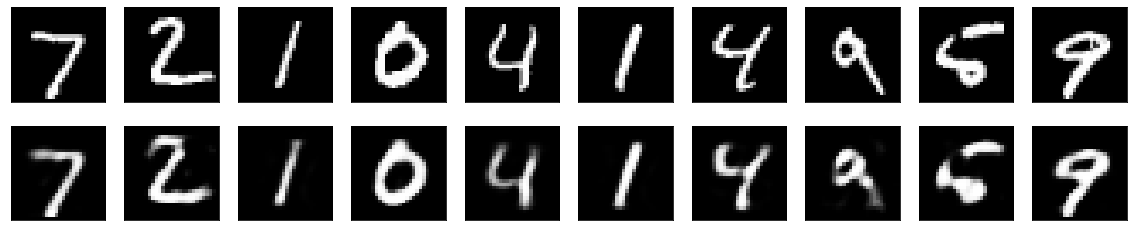

In [11]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

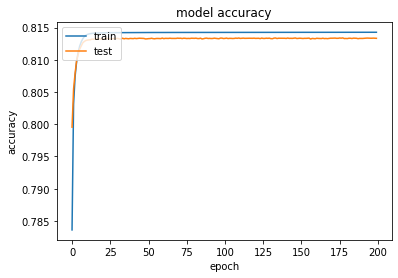

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

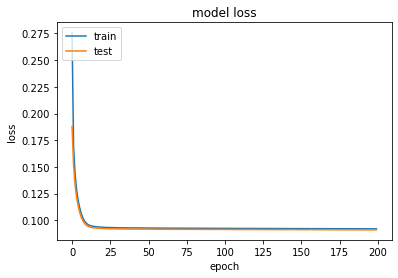

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
history.history['val_accuracy'] # accuracy = 81%

[0.7995426058769226,
 0.8054712414741516,
 0.8079279065132141,
 0.8098713159561157,
 0.8108677268028259,
 0.8116592168807983,
 0.8121411800384521,
 0.8126206994056702,
 0.8128424286842346,
 0.8129923343658447,
 0.81305992603302,
 0.8130926489830017,
 0.8131117820739746,
 0.8132076859474182,
 0.8131944537162781,
 0.8131988048553467,
 0.8132814168930054,
 0.8132196068763733,
 0.8132757544517517,
 0.8132044672966003,
 0.8131850957870483,
 0.8132473826408386,
 0.8133153319358826,
 0.8133024573326111,
 0.8132968544960022,
 0.8132072687149048,
 0.8132575154304504,
 0.8132842779159546,
 0.8133410215377808,
 0.8133103251457214,
 0.8133188486099243,
 0.8132394552230835,
 0.8132224678993225,
 0.8133528828620911,
 0.8132579326629639,
 0.8133181929588318,
 0.8132960200309753,
 0.8132645487785339,
 0.8133176565170288,
 0.8132970929145813,
 0.813285768032074,
 0.8133371472358704,
 0.8132917881011963,
 0.8133207559585571,
 0.8133470416069031,
 0.8133302927017212,
 0.8133293986320496,
 0.8133139610290